# Title: Heart Disease Prediction
`Author:` [Khizer Rehman](khizerr776@gmail.com)\
`Date:` 25-April-2025\
`Dataset:` [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download)



## **About Dataset**
### **Context**

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.
Content
### **Column Descriptions**:

1. `id` (Unique id for each patient)
2. `age` (Age of the patient in years)
3. `origin` (place of study)
4. `sex` (Male/Female)
5. `cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. `chol` (serum cholesterol in mg/dl)
8. `fbs` (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
10. `thalach:` maximum heart rate achieved
11. `exang:` exercise-induced angina (True/ False)
12. `oldpeak:` ST depression induced by exercise relative to rest
13. `slope:` the slope of the peak exercise ST segment
14. `ca:` number of major vessels (0-3) colored by fluoroscopy
15. `thal:` [normal; fixed defect; reversible defect]
16. `num:` the predicted attribute

## **Acknowledgements**
### **Creators:**

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### **Relevant Papers**:

* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
**[Web Link](https://archive.ics.uci.edu/dataset/45/heart+disease)**
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." **[Web Link](https://archive.ics.uci.edu/dataset/45/heart+disease)**
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. **[Web Link](https://archive.ics.uci.edu/dataset/45/heart+disease)**

### **Citation Request**:

The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.


## **Aims and Objective**:
we will fill this after doing some exploratory Data Analysis (EDA)

### Import Libraries
Let's start the project by importing all the libraries that we will need in this project.

In [1]:
# import the necessary libraries

# 1. To handle the data
import pandas as pd 
import numpy as np

# 2. To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 4. machine learning 
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score

# for classification task
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# metric for classification task
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)
#### Explore each Column

In [3]:
# explorating the datatype at each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.shape

(920, 16)

In [ ]:
# id column is not useful for our analysis beacuse it is unique for each row
df['id'].min(), df['id'].max()

(1, 920)

In [ ]:
# 'age' column

# range of "age" column 
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

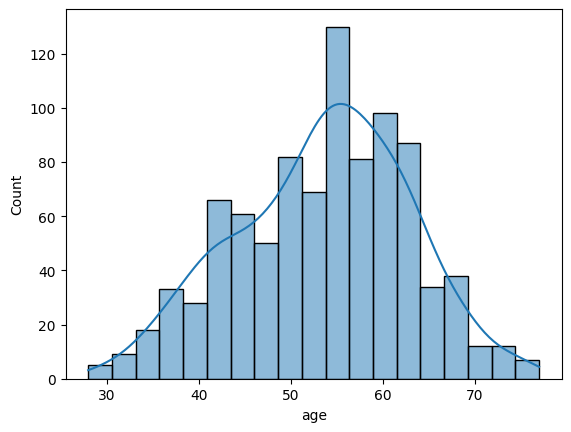

In [9]:
# draw a histogram of the distribution of the "age" column
sns.histplot(df['age'], kde=True)

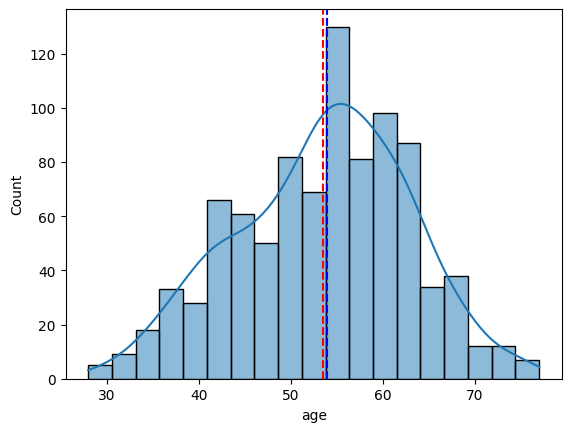

In [10]:
# plot the mean meadian and mode of the "age" column 
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['age'].median(), color='g', linestyle='--', label='Median')
plt.axvline(df['age'].mode()[0], color='b', linestyle='--', label='Mode')


In [ ]:
# plot the histogram of the "age" column using the coloring by gender
figher =px.histogram(df, x='age', color = 'sex')
figher.show()

In [15]:
# find the valuecount of the "sex" column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [14]:
# find the value count of the age column or group by 
# df['age'].value_counts().sort_index()

# use groupby
df.groupby('sex')['age'].value_counts().sort_index()

sex     age
Female  30     1
        31     1
        32     1
        33     1
        34     2
              ..
Male    72     4
        74     6
        75     3
        76     1
        77     2
Name: count, Length: 91, dtype: int64

### Outputs:
1. The minimum age to have a heart disease starts from 28 year.